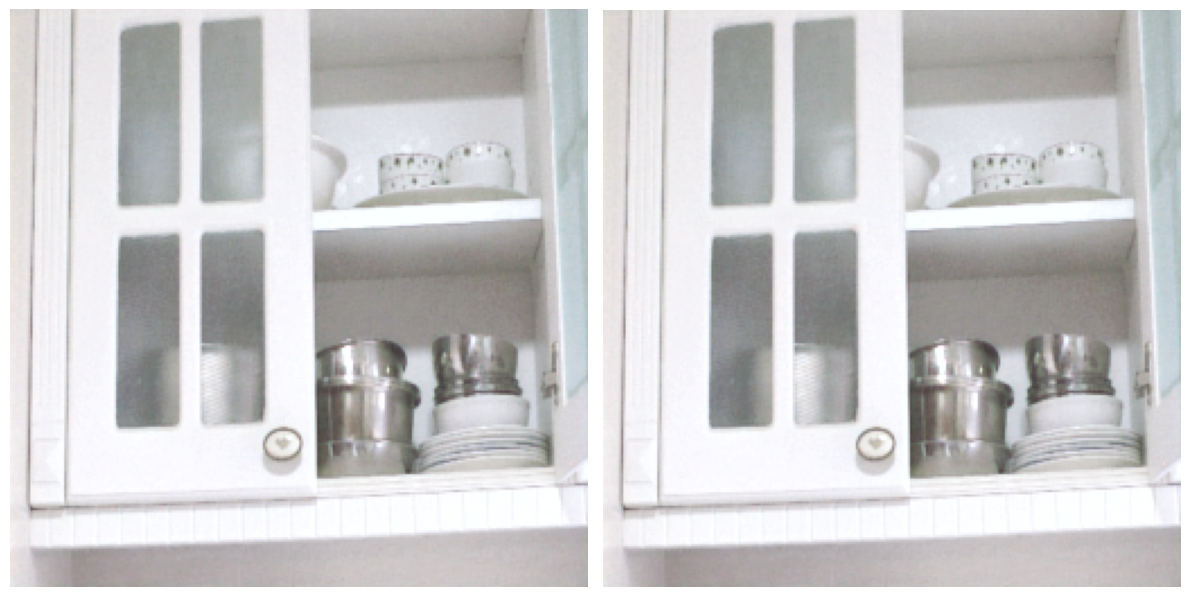

In [26]:
import cv2
import matplotlib.pyplot as plt

high = cv2.imread('/Users/hossshakiba/Desktop/LLIE Paper/LOLdataset/test/high/79.png')
high = cv2.cvtColor(high, cv2.COLOR_BGR2RGB)
img = cv2.imread('/Users/hossshakiba/Desktop/LLIE Paper/LLIE/src/output_images/output_110_5.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# (r, g, b) = cv2.split(img)
# rH = cv2.equalizeHist(r)
# gH = cv2.equalizeHist(g)
# bH = cv2.equalizeHist(b)
# result = cv2.merge((rH, gH, bH))

# hsv_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# hsv_image[:, :, 1] = hsv_image[:, :, 1] * 1.5  # Increase saturation by a factor of 1.5
# image_bolder = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)
# image_bolder = cv2.cvtColor(image_bolder, cv2.COLOR_BGR2RGB)

# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
output_img = cv2.medianBlur(img, 3)

# Split LAB image into L, A, and B channels
l_channel, a_channel, b_channel = cv2.split(cv2.cvtColor(img, cv2.COLOR_RGB2LAB))

# Increase contrast of the L channel
l_channel_contrast = cv2.convertScaleAbs(l_channel, alpha=1.25, beta=6)

# Merge the contrast-enhanced L channel with the original A and B channels
image_lab_contrast = cv2.merge((l_channel_contrast, a_channel, b_channel))

# Convert the contrast-enhanced LAB image back to BGR color space
output_img = cv2.cvtColor(image_lab_contrast, cv2.COLOR_LAB2RGB)



fig, axs = plt.subplots(1, 2, figsize=(12, 12))

# Display the first image in the first subplot
axs[0].imshow(output_img)
axs[0].axis('off')  # Turn off the axis labels for the first subplot

# Display the second image in the second subplot
axs[1].imshow(output_img)
axs[1].axis('off')  # Turn off the axis labels for the second subplot

# axs[2].imshow(high)
# axs[2].axis('off')  # Turn off the axis labels for the second subplot


# Adjust the spacing between subplots
plt.tight_layout()
plt.show()

In [53]:
import cv2
from PIL import Image
import numpy as np

# Read the image using OpenCV
image_path = '/Users/hossshakiba/Desktop/LLIE Paper/LLIE/src/output_images/output_50_6.png'
image = cv2.imread(image_path)

# Convert the image to RGB format (if it's in BGR format)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply checkerboard artifact reduction using median filtering
filtered_image = cv2.medianBlur(image, 3)

# Enhance the colors and contrast of the image
enhanced_image = cv2.convertScaleAbs(filtered_image, alpha=1.5, beta=0)

# Upscale the image using bicubic interpolation
upscaled_image = cv2.resize(enhanced_image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

# Display the original and processed images
original_image = Image.fromarray(image)
filtered_image = Image.fromarray(filtered_image)
enhanced_image = Image.fromarray(enhanced_image)
upscaled_image = Image.fromarray(upscaled_image)

original_image.show(title='Original Image')
filtered_image.show(title='Filtered Image')
enhanced_image.show(title='Enhanced Image')
upscaled_image.show(title='Upscaled Image')


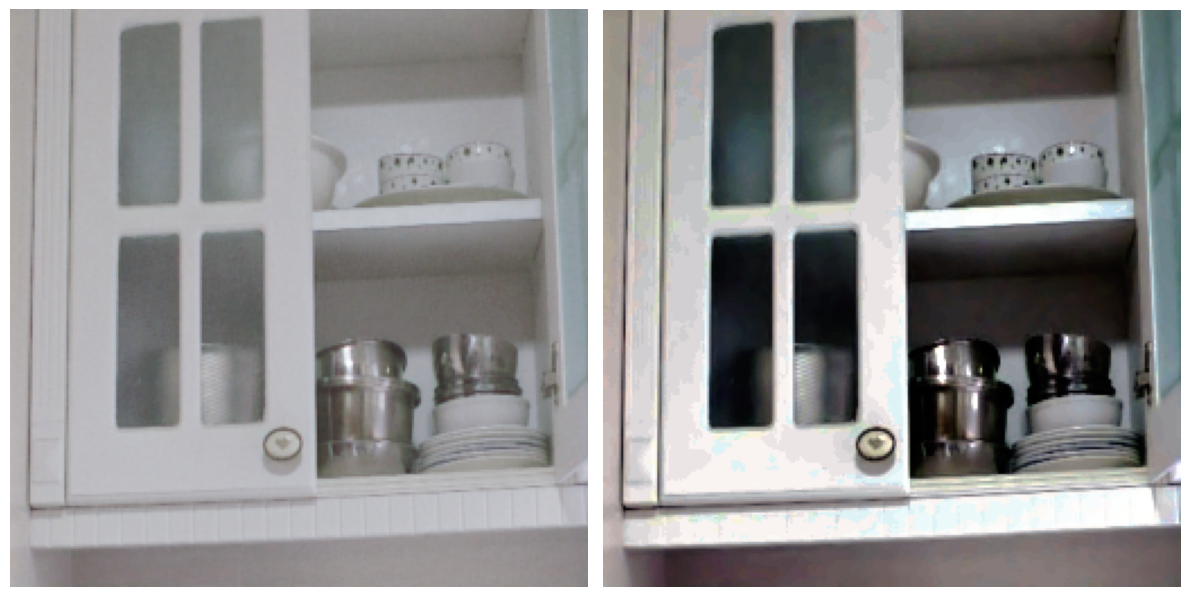

In [29]:
import cv2
import matplotlib.pyplot as plt

def denoise_nlm(image, h=2, template_window=7, search_window=5):
    """
    Apply Non-local Means denoising to the input image.
    
    Args:
        image (numpy.ndarray): Input image (RGB or BGR).
        h (float): Parameter controlling the strength of filtering. Higher values preserve more detail but may not remove enough noise (default: 10).
        template_window (int): Size of the template window (default: 7).
        search_window (int): Size of the search window (default: 21).
    
    Returns:
        numpy.ndarray: Denoised image.
    """
    denoised_image = cv2.fastNlMeansDenoisingColored(image, None, h, h, template_window, search_window)
    return denoised_image

# Read input image
image = cv2.imread('/Users/hossshakiba/Desktop/LLIE Paper/LLIE/src/output_images/output_110_5.png')

# Convert image to RGB format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply NLM denoising
denoised_image = denoise_nlm(image_rgb)


(r, g, b) = cv2.split(denoised_image)
rH = cv2.equalizeHist(r)
gH = cv2.equalizeHist(g)
bH = cv2.equalizeHist(b)
result = cv2.merge((rH, gH, bH))

fig, axs = plt.subplots(1, 2, figsize=(12, 12))

# Display the original image in the first subplot
axs[0].imshow(image_rgb)
axs[0].axis('off')

# Display the denoised image in the second subplot
axs[1].imshow(denoised_image)
axs[1].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image

# Load the pretrained DnCNN model
model = torch.hub.load('z-bingo/weighted-denoise', 'dncnn')

# Set the model to evaluation mode
model.eval()

# Define the image transformation
transform = transforms.ToTensor()

# Load the input image
image = Image.open('/Users/hossshakiba/Desktop/LLIE Paper/LLIE/src/output_images/output_110_5.png')

# Apply the transformation to convert the image to tensor
input_tensor = transform(image).unsqueeze(0)

# Denoise the image using the pretrained model
with torch.no_grad():
    denoised_tensor = model(input_tensor)

# Convert the output tensor to PIL Image
denoised_image = transforms.ToPILImage()(denoised_tensor.squeeze(0))

# Display the input and denoised images
image.show(title='Input Image')
denoised_image.show(title='Denoised Image')


In [ ]:
import cv2
import numpy as np
from bm3d import bm3d

# Read the image using OpenCV
image = cv2.imread('path/to/image.jpg')

# Convert the image to grayscale if necessary
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Convert the image to float32 and normalize the pixel values to [0, 1]
image_gray = image_gray.astype(np.float32) / 255.0

# Apply BM3D denoising to the image
denoised_image = bm3d(image_gray, sigma_psd=0.1)  # Adjust sigma_psd parameter as needed

# Convert the denoised image back to uint8 format
denoised_image = (denoised_image * 255).astype(np.uint8)

# Display the original and denoised images
fig, axs = plt.subplots(1, 2, figsize=(12, 12))

# Display the original image in the first subplot
axs[0].imshow(image)
axs[0].axis('off')

# Display the denoised image in the second subplot
axs[1].imshow(denoised_image)
axs[1].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()
